<h1>
    Sommaire<span class="tocSkip"></span>
</h1>
<br>
<div class="toc">
    <ul class="toc-item">
        <li>
            <span>
                <a href="#Chargement-des-données" data-toc-modified-id="Chargement-des-données-1">
                    <span class="toc-item-num">1.&nbsp;&nbsp;</span>Chargement des données
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Segmentation-RFM-:-baseline" data-toc-modified-id="Segmentation-RFM-:-baseline-2">
                    <span class="toc-item-num">2.&nbsp;&nbsp;</span>Segmentation RFM : baseline
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Automatique" data-toc-modified-id="Automatique">
                            <span class="toc-item-num">2.1.&nbsp;&nbsp;</span>Automatique
                        </a>
                    </span>
                </li>
                <li>
                    <span>
                        <a href="#Manuelle" data-toc-modified-id="Manuelle">
                            <span class="toc-item-num">2.2.&nbsp;&nbsp;</span>Manuelle
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-kmeans-sur-plusieurs-variables-numériques" data-toc-modified-id="Segmentation-kmeans-sur-plusieurs-variables-numériques-3">
                    <span class="toc-item-num">3.&nbsp;&nbsp;</span>Segmentation kmeans sur plusieurs variables numériques
                </a>
            </span>
            <ul class="toc-item">
                <li>
                    <span>
                        <a href="#Challenge-kmeans-avec-4-clusters" data-toc-modified-id="Challenge-kmeans-avec-4-clusters-31">
                            <span class="toc-item-num">3.1.&nbsp;&nbsp;</span>Challenge kmeans avec 4 clusters
                        </a>
                    </span>
                </li>
            </ul>
        </li>
        <li>
            <span>
                <a href="#Segmentation-k-prototypes-sur-tout-type-de-variables" data-toc-modified-id="Segmentation-k-prototypes-sur-tout-type-de-variables-4">
                    <span class="toc-item-num">4.&nbsp;&nbsp;</span>Segmentation k prototypes sur tout type de variables
                </a>
            </span>
        </li>
        <li>
            <span>
                <a href="#Analyse-de-la-stabilité-de-la-segmentation" data-toc-modified-id="Analyse-de-la-stabilité-de-la-segmentation-5">
                    <span class="toc-item-num">5.&nbsp;&nbsp;</span>Analyse de la stabilité de la segmentation
                </a>
            </span>
        </li>
    </ul>
</div>

In [1]:
import pandas as pd

dossier_data = "data/"
nom_fichier = "flipkart_com-ecommerce_sample_1050.csv"
produits_data = pd.read_csv(dossier_data+nom_fichier)

In [2]:
produits_data

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,2015-12-01 10:15:43 +0000,http://www.flipkart.com/oren-empower-extra-lar...,Oren Empower Extra Large Self Adhesive Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE88ZGTX65GH4V,1399.0,999.0,958f54f4c46b53c8a0a9b8167d9140bc.jpg,False,Oren Empower Extra Large Self Adhesive Sticker...,No rating available,No rating available,Oren Empower,"{""product_specification""=>[{""key""=>""Number of ..."
1046,fd6cbcc22efb6b761bd564c28928483c,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-large-vinyl...,Wallmantra Large Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIEC889ZD5GDCVQ,4930.0,1896.0,fd6cbcc22efb6b761bd564c28928483c.jpg,False,Wallmantra Large Vinyl Sticker Sticker (Pack o...,No rating available,No rating available,Wallmantra,"{""product_specification""=>[{""key""=>""Number of ..."
1047,5912e037d12774bb73a2048f35a00009,2015-12-01 10:15:43 +0000,http://www.flipkart.com/uberlyfe-extra-large-p...,Uberlyfe Extra Large Pigmented Polyvinyl Films...,"[""Baby Care >> Baby & Kids Gifts >> Stickers >...",STIE5UVGW2JWVWCT,4500.0,1449.0,5912e037d12774bb73a2048f35a00009.jpg,False,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,No rating available,No rating available,Uberlyfe,"{""product_specification""=>[{""key""=>""Number of ..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,2015-12-01 10:15:43 +0000,http://www.flipkart.com/wallmantra-medium-viny...,Wallmantra Medium Vinyl Sticker Sticker,"[""Baby Care >> Baby & Kids Gifts >> Stickers >.

In [98]:
produits_data.product_category_tree.sample(15)

469     ["Kitchen & Dining >> Bar & Glassware >> Bar G...
1005    ["Beauty and Personal Care >> Makeup >> Eyes >...
504     ["Computers >> Laptop Accessories >> Batteries...
733     ["Computers >> Computer Peripherals >> Printer...
110     ["Baby Care >> Infant Wear >> Baby Girls' Clot...
872           ["Home Furnishing >> Bath Linen >> Towels"]
395     ["Beauty and Personal Care >> Fragrances >> De...
968     ["Baby Care >> Baby Bedding >> Baby Bedsheets ...
794     ["Beauty and Personal Care >> Combos and Kits ...
841     ["Computers >> Laptop Accessories >> USB Gadge...
297     ["Baby Care >> Infant Wear >> Baby Boys' Cloth...
235     ["Kitchen & Dining >> Kitchen Tools >> Kitchen...
107     ["Home Furnishing >> Bed Linen >> Blankets, Qu...
400     ["Computers >> Network Components >> Routers >...
148     ["Kitchen & Dining >> Coffee Mugs >> Rockmantr...
Name: product_category_tree, dtype: object

# Analyse et prétraitement des descriptions

## Tokenization, retrait de la ponctuation et mise en minuscules

In [19]:
produits_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

Déjà, il n'y a pas de donnée manquante dans cette variable.

In [198]:
# Conservation de l'id et de la description pour la travailler et l'analyser
descriptions = produits_data[['uniq_id', 'description']].copy() 

In [199]:
descriptions

,uniq_id,description
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...
...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...


In [200]:
import nltk

# conserve les mots d'au moins une lettre (supprime donc la ponctuation et les nombres)
tokenizer = nltk.RegexpTokenizer(r'[A-Za-z]+')

# tokenization et mise en minuscules des descriptions
descriptions["description_tokenisee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    descriptions.loc[index_ligne, "description_tokenisee"] = tokenizer.tokenize(ligne['description'].lower())

In [201]:
descriptions

,uniq_id,description,description_tokenisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [24]:
def recuperer_ensemble_mots(descriptions_tokenisees):
    """
    Retourne la liste complète des mots de chacune des descriptions tokenisees.
    
    
    Paramètre :
        - descriptions_tokenisees : Series
    """
    
    liste_totalite_mots = []
    for index, description_tokenisee in descriptions_tokenisees.items():
        for mot in description_tokenisee:
            liste_totalite_mots.append(mot)
            
    return liste_totalite_mots

In [29]:
def calculer_frequences_apparitions_mots(liste_mots):
    """
    Calcule la fréquence d'apparition de chaque mot présent dans liste_mots et retourne 
    un DataFrame contenant ces fréquences.
    
    Paramètre : 
        - liste_mots : List
    """
    
    frequences_apparitions_mots = nltk.FreqDist(liste_mots)
    df_freq = pd.DataFrame.from_dict(frequences_apparitions_mots, orient='index', columns=['nb_apparitions'])
    df_freq.sort_values(by="nb_apparitions", ascending=False, inplace=True)
    return df_freq

In [81]:
liste_mots = recuperer_ensemble_mots(descriptions['description_tokenisee'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

**Top 50 des mots les plus utilisés dans l'ensemble des descriptions avant suppression des mots**

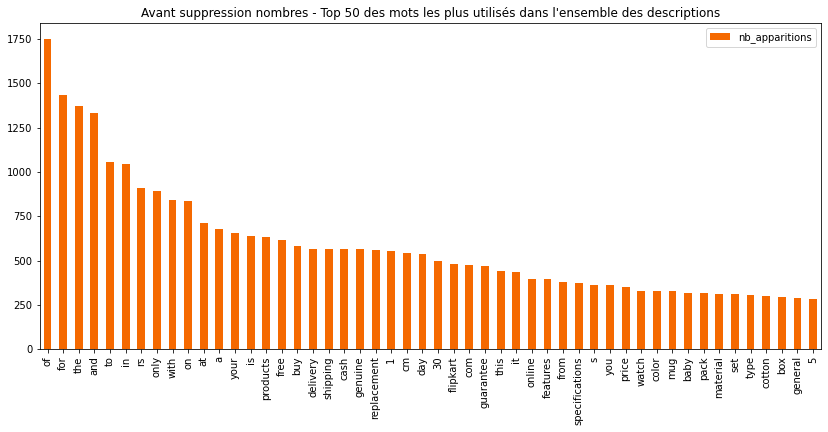

In [78]:
# Affichage des 50 mots les plus utilisés dans l'ensemble des descriptions
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (14, 6)

titre = 'Avant suppression nombres - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

On voit clairement que les mots de liaisons sont les plus nombreux, ils seront supprimés lors de l'étape de suppression des stopwords. C'est le cas aussi des unités comme "rs", "cm", les nombres et le nom du site "flipkart.com", une suppression plus manuelle sera probablement à effectuer.

**Top 50 des mots les plus utilisés dans l'ensemble des descriptions après suppression des mots**

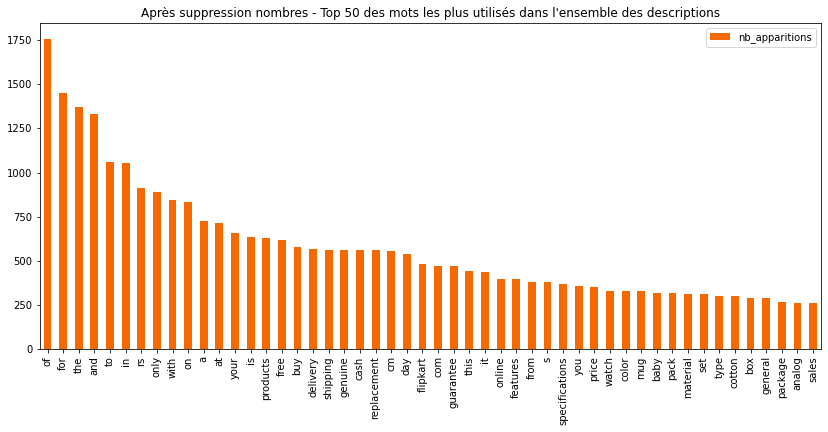

In [82]:
titre = 'Après suppression nombres - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

## Suppression des stopwords

In [83]:
# Récupération des stopwords en anglais
#nltk.download('stopwords') # une fois installé, affiche un warning
stopwords = nltk.corpus.stopwords.words('english')

In [202]:
descriptions

,uniq_id,description,description_tokenisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo..."
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic..."


In [203]:
# On retire les stopwords pour chaque description tokenisée
descriptions["description_sans_stopword"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_tokenisee = ligne["description_tokenisee"]
    descriptions.loc[index_ligne, "description_sans_stopword"] = [mot for mot in description_tokenisee if mot not in stopwords]

In [204]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[buy, uberlyfe, extra, large, pigmented, polyv..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[buy, wallmantra, medium, vinyl, sticker, stic..."


In [87]:
liste_mots = recuperer_ensemble_mots(descriptions['description_sans_stopword'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

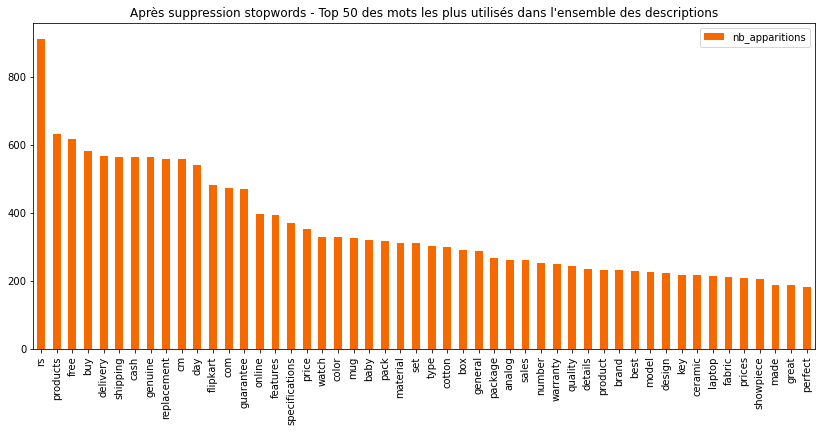

In [90]:
titre = 'Après suppression stopwords - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

Parmi les mots les plus utilisés, il reste des mots qui n'apportent pas d'information utile pour catégoriser le produit. Cela concerne :
- rs (unité de prix)
- products
- free
- buy
- delivery
- shipping
- cash
- genuine
- replacement
- cm
- day
- flipkart (provient du nom du site flipkart.com)
- com (provient du nom du site flipkart.com)
- guarantee
- online
- price
- model
- x (qui est utilisé pour les dimensions comme 24x24 cm)

In [128]:
mots_sans_info = ['rs', 'products', 'free', 'buy', 'delivery', 'shipping', 'cash', 'genuine', 'replacement', 'cm',
                  'day', 'flipkart', 'com', 'guarantee', 'online', 'price', 'model', 'x']

In [205]:
# suppression des mots ci-dessus des descriptions sans stopword
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_sans_stopword"] = [mot for mot in description_sans_stopword 
                                                                          if mot not in mots_sans_info]

In [206]:
liste_mots = recuperer_ensemble_mots(descriptions['description_sans_stopword'])
frequences_apparition_mots = calculer_frequences_apparitions_mots(liste_mots)

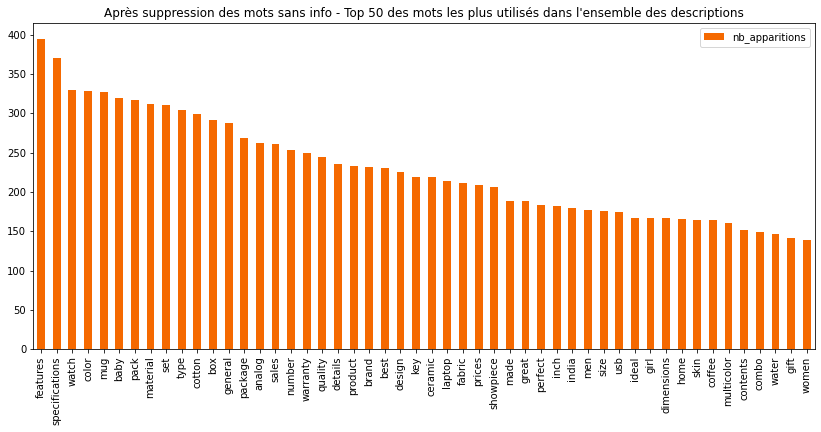

In [207]:
titre = 'Après suppression des mots sans info - Top 50 des mots les plus utilisés dans l\'ensemble des descriptions'
frequences_apparition_mots[:50].plot(kind='bar', 
                                     color="#f56900", 
                                     title=titre);

## Lemmatisation et stemming

In [161]:
# Instanciation de l'objet qui lemmatisera mes descriptions
from nltk.stem import WordNetLemmatizer
#nltk.download('wordnet') # une fois installé, affiche un warning
lemmatizer = WordNetLemmatizer()

In [208]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,..."
...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [209]:
# On lemmatise chacune des descriptions sans stopword
descriptions["description_lemmatisee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_lemmatisee"] = [lemmatizer.lemmatize(mot) for mot in description_sans_stopword]

In [210]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ..."
...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


La lemmatisation ne réduit que les noms sous leur forme canonique car la méthode ne fonctionne qu'avec un seul type de mot. Cette technique n'est pas forcément la plus appropriée pour l'anglais car les adjectifs sont invariables.

In [211]:
# On lemmatise sur les verbes chacune des descriptions sans stopword
descriptions["description_lemmatisee_verbe"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_lemmatisee_verbe"] = [lemmatizer.lemmatize(mot, 'v') 
                                                                     for mot in description_sans_stopword]

In [212]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t...","[key, feature, eurospa, cotton, terry, face, t..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ...","[key, feature, jaipur, print, cotton, floral, ..."
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [185]:
# Instanciation de l'objet qui ne conservera que les racines des descriptions
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()

In [220]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,...","[specifications, sathiyas, cotton, bath, towel..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t...","[key, feature, eurospa, cotton, terry, face, t..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ...","[key, feature, jaipur, print, cotton, floral, ..."
...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [221]:
# On ne garde que les racines des mots de chacune des descriptions sans stopword
descriptions["description_stemmee"] = ""
for index_ligne, ligne in descriptions.iterrows():
    description_sans_stopword = ligne["description_sans_stopword"]
    descriptions.loc[index_ligne, "description_stemmee"] = [stemmer.stem(mot) for mot in description_sans_stopword]

In [222]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe,description_stemmee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor...","[key, featur, eleg, polyest, multicolor, abstr..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,...","[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t...","[key, feature, eurospa, cotton, terry, face, t...","[key, featur, eurospa, cotton, terri, face, to..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton...","[key, featur, santosh, royal, fashion, cotton,..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ...","[key, feature, jaipur, print, cotton, floral, ...","[key, featur, jaipur, print, cotton, floral, k..."
...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empow, extra, larg, self, adhes, sticke..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, larg, vinyl, sticker, sticker, pa..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f...","[uberlyf, extra, larg, pigment, polyvinyl, fil..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


# Construction de features

## Bag-of-words 1-gram

### Avec la lemmatisation

In [284]:
# Préparation du dataset
bag_of_words_lemme = descriptions[["uniq_id", "description", "description_lemmatisee_verbe"]].copy()

In [285]:
# Conversion des descriptions lemmatisées sous forme de liste vers un string
for index_ligne, ligne in bag_of_words_lemme.iterrows():
    description_lemmatisee_liste = ligne["description_lemmatisee_verbe"]
    bag_of_words_lemme.loc[index_ligne, "description_lemmatisee_txt"] = ' '.join(description_lemmatisee_liste)

In [286]:
liste_descriptions_lemmatisees = bag_of_words_lemme["description_lemmatisee_txt"].to_list()

In [287]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer() #to take max features(columns), 2500
x = cv.fit_transform(liste_descriptions_lemmatisees).toarray()
liste_vocabulaire = cv.get_feature_names()
bag_of_words = pd.DataFrame(data=x, columns=liste_vocabulaire)
bag_of_words_lemme = pd.concat([bag_of_words_lemme, bag_of_words], axis=1)

In [308]:
verif = pd.DataFrame(bag_of_words_lemme["description_lemmatisee_verbe"].copy())

In [309]:
for index_ligne, ligne in verif.iterrows():
    verif.loc[index_ligne, "nb_mots_description_lemmatisee"] = len(verif["description_lemmatisee_verbe"][index_ligne])

verif["nb_mots_description_bow"] = bag_of_words_lemme[liste_vocabulaire].sum(axis=1)

In [311]:
verif

,description_lemmatisee_verbe,nb_mots_description_lemmatisee,nb_mots_description_bow
0,"[key, feature, elegance, polyester, multicolor...",145.0,145
1,"[specifications, sathiyas, cotton, bath, towel...",60.0,60
2,"[key, feature, eurospa, cotton, terry, face, t...",148.0,147
3,"[key, feature, santosh, royal, fashion, cotton...",104.0,104
4,"[bed, bed, bed, bed, bed, bedsheet, bedsheet, ...",141.0,140
...,...,...,...
1045,"[oren, empower, extra, large, self, adhesive, ...",222.0,220
1046,"[wallmantra, large, vinyl, sticker, sticker, p...",148.0,148
1047,"[uberlyfe, extra, large, pigment, polyvinyl, f...",18.0,18
1048,"[wallmantra, medium, vinyl, sticker, sticker, ...",12.0,12


In [313]:
descriptions

,uniq_id,description,description_tokenisee,description_sans_stopword,description_lemmatisee,description_lemmatisee_verbe,description_stemmee
0,55b85ea15a1536d46b7190ad6fff8ce7,Key Features of Elegance Polyester Multicolor ...,"[key, features, of, elegance, polyester, multi...","[key, features, elegance, polyester, multicolo...","[key, feature, elegance, polyester, multicolor...","[key, feature, elegance, polyester, multicolor...","[key, featur, eleg, polyest, multicolor, abstr..."
1,7b72c92c2f6c40268628ec5f14c6d590,Specifications of Sathiyas Cotton Bath Towel (...,"[specifications, of, sathiyas, cotton, bath, t...","[specifications, sathiyas, cotton, bath, towel...","[specification, sathiyas, cotton, bath, towel,...","[specifications, sathiyas, cotton, bath, towel...","[specif, sathiya, cotton, bath, towel, bath, t..."
2,64d5d4a258243731dc7bbb1eef49ad74,Key Features of Eurospa Cotton Terry Face Towe...,"[key, features, of, eurospa, cotton, terry, fa...","[key, features, eurospa, cotton, terry, face, ...","[key, feature, eurospa, cotton, terry, face, t...","[key, feature, eurospa, cotton, terry, face, t...","[key, featur, eurospa, cotton, terri, face, to..."
3,d4684dcdc759dd9cdf41504698d737d8,Key Features of SANTOSH ROYAL FASHION Cotton P...,"[key, features, of, santosh, royal, fashion, c...","[key, features, santosh, royal, fashion, cotto...","[key, feature, santosh, royal, fashion, cotton...","[key, feature, santosh, royal, fashion, cotton...","[key, featur, santosh, royal, fashion, cotton,..."
4,6325b6870c54cd47be6ebfbffa620ec7,Key Features of Jaipur Print Cotton Floral Kin...,"[key, features, of, jaipur, print, cotton, flo...","[key, features, jaipur, print, cotton, floral,...","[key, feature, jaipur, print, cotton, floral, ...","[bed, bed, bed, bed, bed, bedsheet, bedsheet, ...","[key, featur, jaipur, print, cotton, floral, k..."
...,...,...,...,...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc,Oren Empower Extra Large Self Adhesive Sticker...,"[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empower, extra, large, self, adhesive, ...","[oren, empow, extra, larg, self, adhes, sticke..."
1046,fd6cbcc22efb6b761bd564c28928483c,Wallmantra Large Vinyl Sticker Sticker (Pack o...,"[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, large, vinyl, sticker, sticker, p...","[wallmantra, larg, vinyl, sticker, sticker, pa..."
1047,5912e037d12774bb73a2048f35a00009,Buy Uberlyfe Extra Large Pigmented Polyvinyl F...,"[buy, uberlyfe, extra, large, pigmented, polyv...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigmented, polyvinyl,...","[uberlyfe, extra, large, pigment, polyvinyl, f...","[uberlyf, extra, larg, pigment, polyvinyl, fil..."
1048,c3edc504d1b4f0ba6224fa53a43a7ad6,Buy Wallmantra Medium Vinyl Sticker Sticker fo...,"[buy, wallmantra, medium, vinyl, sticker, stic...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ...","[wallmantra, medium, vinyl, sticker, sticker, ..."


In [305]:
liste_mots_verif = verif["description_lemmatisee_verbe"][4].copy()
liste_mots_verif.sort()

In [306]:
verif["description_lemmatisee_verbe"][4]

['bed',
 'bed',
 'bed',
 'bed',
 'bed',
 'bedsheet',
 'bedsheet',
 'bedsheet',
 'bedsheet',
 'bedsheet',
 'bleach',
 'box',
 'brand',
 'care',
 'color',
 'colour',
 'comfort',
 'content',
 'cotton',
 'cotton',
 'cotton',
 'cotton',
 'cotton',
 'cotton',
 'count',
 'cover',
 'cover',
 'cover',
 'cover',
 'cover',
 'defect',
 'depth',
 'depth',
 'dimension',
 'double',
 'double',
 'double',
 'exchange',
 'fabric',
 'fast',
 'feature',
 'fit',
 'fit',
 'fit',
 'flat',
 'flat',
 'flat',
 'flat',
 'floral',
 'floral',
 'floral',
 'g',
 'general',
 'give',
 'give',
 'give',
 'good',
 'hand',
 'id',
 'inch',
 'inch',
 'inch',
 'inch',
 'jaipur',
 'jaipur',
 'jaipur',
 'jaipur',
 'jaipur',
 'jaipur',
 'key',
 'king',
 'king',
 'king',
 'king',
 'length',
 'length',
 'length',
 'life',
 'long',
 'look',
 'machine',
 'machinewash',
 'make',
 'manufacture',
 'material',
 'name',
 'nice',
 'nice',
 'number',
 'onle',
 'origional',
 'pack',
 'package',
 'package',
 'pillow',
 'pillow',
 'pillow',
 

In [300]:
liste_mots_verif

['bed',
 'bed',
 'bed',
 'bed',
 'bed',
 'bedsheet',
 'bedsheet',
 'bedsheet',
 'bedsheet',
 'bedsheet',
 'bleach',
 'box',
 'brand',
 'care',
 'color',
 'colour',
 'comfort',
 'content',
 'cotton',
 'cotton',
 'cotton',
 'cotton',
 'cotton',
 'cotton',
 'count',
 'cover',
 'cover',
 'cover',
 'cover',
 'cover',
 'defect',
 'depth',
 'depth',
 'dimension',
 'double',
 'double',
 'double',
 'exchange',
 'fabric',
 'fast',
 'feature',
 'fit',
 'fit',
 'fit',
 'flat',
 'flat',
 'flat',
 'flat',
 'floral',
 'floral',
 'floral',
 'g',
 'general',
 'give',
 'give',
 'give',
 'good',
 'hand',
 'id',
 'inch',
 'inch',
 'inch',
 'inch',
 'jaipur',
 'jaipur',
 'jaipur',
 'jaipur',
 'jaipur',
 'jaipur',
 'key',
 'king',
 'king',
 'king',
 'king',
 'length',
 'length',
 'length',
 'life',
 'long',
 'look',
 'machine',
 'machinewash',
 'make',
 'manufacture',
 'material',
 'name',
 'nice',
 'nice',
 'number',
 'onle',
 'origional',
 'pack',
 'package',
 'package',
 'pillow',
 'pillow',
 'pillow',
 

In [245]:
### à supprimer - Récupération du vocabulaire utilisé après la lemmatisation
liste_vocabulaire = recuperer_ensemble_mots(bag_of_words_lemme['description_lemmatisee_verbe'])
liste_vocabulaire = list(set(liste_vocabulaire)) # récupération des mots uniques grâce à la conversion avec set
liste_vocabulaire.sort()